In [21]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

## Exercício 1

Conjunto de dados Iris.
1. Ajuste um modelo PCA para transformar todos os atributos do dataset Iris (PCA). Plote as duas componentes principais do modelo. Inclua o Índice de Variabilidade Explicada em algum lugar de seu gráfico. Como esse gráfico se difere do gráfico do exercício 3 do capítulo anterior?
2. Faça o mesmo procedimento, porém usando três componentes.
3. Ajuste um modelo de clusterização KNN com N=3 para o modelo transformado pela PCA.
4. Faça um gráfico com o grupos criados e compare com o gráfico anterior com as classes reais. Qual a diferença entre os grupos e os rótulos originais?

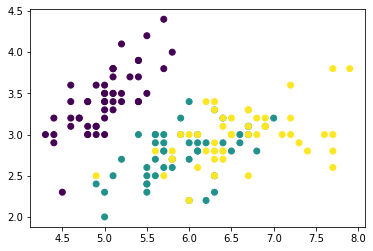

In [110]:
# Dados Originais
iris = load_iris()

X = iris.data
y = iris.target

plt.scatter(X[:,0],X[:,1], c=y)
plt.show()

In [29]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Shape antes do PCA: (150, 4)
Shape depois do PCA: (150, 2)


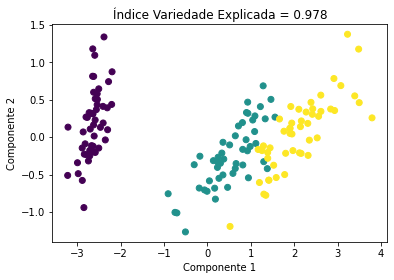

In [122]:
# Ajuste PCA (2 componentes)

print('Shape antes do PCA:', X.shape)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

print('Shape depois do PCA:', X_pca.shape)

plt.title("Índice Variedade Explicada = {:.3f}".format(pca.explained_variance_ratio_.sum()))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

**Resposta**

Usando o PCA de 2 componentes, obtemos um gráfico diferente do gráfico do exercício 3 do capítulo anterior devido ao fato de que reduzimos a dimensionalidade e "agrupamos" em 2 componentes os dados (como se fosse feito um resumo)

Shape antes do PCA: (150, 4)
Shape depois do PCA: (150, 3)


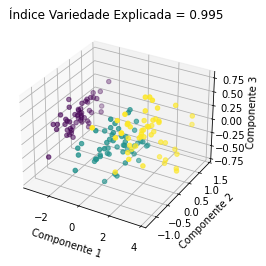

In [112]:
# Ajuste PCA (3 componentes)

print('Shape antes do PCA:', X.shape)

pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

print('Shape depois do PCA:', X_pca.shape)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('Componente 1')
ax.set_ylabel('Componente 2')
ax.set_zlabel('Componente 3')
ax.set_title("Índice Variedade Explicada = {:.3f}".format(pca.explained_variance_ratio_.sum()))
ax.scatter(X_pca[:,0], X_pca[:,1], X_pca[:,2], c=y)
plt.show()

In [143]:
# Ajuste Modelo KNN
knn = KMeans(n_clusters=3).fit(X_pca)
knn.labels_ 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

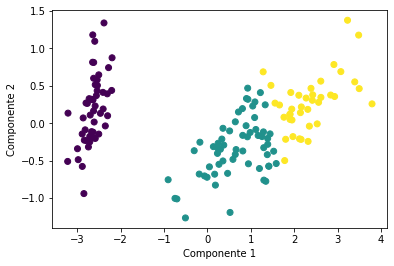

In [147]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=knn.labels_)
plt.xlabel('Componente 1')
plt.ylabel('Componente 2')
plt.show()

**Resposta**

Pode-se perceber que após a aplicação do modelo KNN, o gráfico se manteve praticamente o mesmo quando comparado com as classes originais do PCA, porém houveram testes em que os rótulos ficaram "trocados" (*Ex.: onde antes era classificado com a cor roxa, no modelo KNN foi classificado com a cor verde*).